# Making a Movie

There are two methods to do this. You can either use the command line or use a python script. The command line is useful for producing quick movies without a lot of user input or tweaking. The python script is more useful for slightly more custom movies.

## Command Line

## Python Script

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [137]:
import k2movie
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [141]:
#Initialise the movie object
mov = k2movie.movie(channel=1,
                  cadence='all',
                  campaign=8,
                  data_dir='../database/')

### Specifying sources
You can specify a source to build a movie at in three ways: 
* Specify a location on the focal plane with two integers
* Specify an RA and Dec with two values with units of degrees
* Specify a source name

### Inspecting
You can inspect the movie object before you compute the full movie so that you will have an idea of the neighbouring sources and whether you are on target.

Both of these are demonstrated below.

/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:591: RuntimeWarning: invalid value encountered in log10
  ar=np.log10(ar)


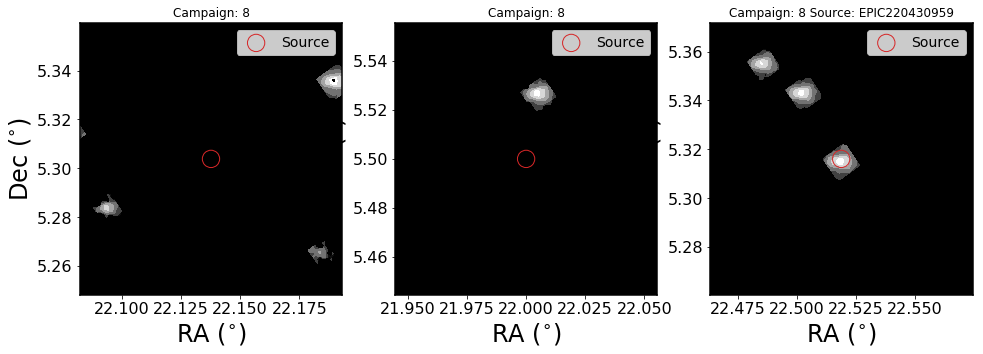

In [142]:
fig, ax = plt.subplots(1,3,figsize=(16,5))

#Specify a source location on the focal plane
mov.loc=(700,200)
mov.inspect(ax[0])

#Specify a source ra and dec
mov.loc=(22.*u.deg,5.5*u.deg)
mov.inspect(ax[1])

#Specify a source by name
mov.loc=None                     #Note a source location will take precedence over a source name.
mov.name='EPIC220430959'
mov.inspect(ax[2])

# How do you run with no specified channel?

### Creating a movie
Once you are happy you've found your source and the window tolerance is high enough you can compute the movie. This will take some time, depending on how large a tolerance you've set and how many cadences you've included. You can use *movsampling* to reduce the number of frames that are in the movie, reducing the time to create it.

In [157]:
#All cadences are being added to the movie. This will take a few minutes.
mov.loc = None
mov.cadence = None
mov.movsampling = 10 #Only output every 10 frames.
mov.compute()

/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:457: RuntimeWarning: invalid value encountered in log10
  if self.scale=='log':


In [1]:
import io
import base64
from IPython.display import HTML

video = io.open('out.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))